In [1]:
from utils.binaries import *
from utils.plotting import *
import uproot

16:07:26 (  +63.4s) [INFO   ] -- import logging
16:07:26 (  +228ms) [INFO   ] -- import numpy as np
16:07:26 (   +16ms) [INFO   ] -- import uncertainties
16:07:27 (  +969ms) [INFO   ] -- import pandas as pd
16:07:27 (    +5ms) [WARNING] -- pandas support to be dropped at some point!
16:07:27 (    +3ms) [INFO   ] -- import binaries.tools as tools
16:07:28 (  +952ms) [INFO   ] -- import matplotlib.pyplot as plt
16:07:29 (   +1.2s) [INFO   ] -- import seaborn as so
16:07:29 (   +24ms) [DEBUG  ] -- font size set to 9.5
16:07:29 (    +1ms) [DEBUG  ] -- label size set to 13.0
16:07:29 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
16:07:29 (    +1ms) [DEBUG  ] -- markersize set to 2.0
16:07:29 (    +0ms) [DEBUG  ] -- usetex set to False
16:07:29 (    +2ms) [INFO   ] -- import plotting.tools as plot


In [2]:
def get_start_stop_variance(path):
    file = uproot.open(f"{path}:AugerUpTime")
    variances = np.array(file["ADCVariance"].array(), dtype=float)[:, -3:, :]
    shutter_open_fraction = np.array(file["ShutterFraction8ADC"].array())[:, -3:]
    variances *= shutter_open_fraction[:, :, np.newaxis]

    indices = [i for i, var in enumerate(variances) if np.sum(var) != 0]
    # indices = [i for i, var in enumerate(variances) if np.all(np.logical_and(var.mean(axis=1)>0, var.mean(axis=1)<200))]
    start, stop = file["uptime_gpsStart"].array(), file["uptime_gpsStop"].array()
    return start[indices], stop[indices], variances[indices]


def get_calibration_constant(date, method):

    results = "/cr/data01/filip/xy-calibration/results/"

    # force preclean usage
    # date = '2023-07'

    # force postclean usage
    date = "2023-11"

    if date < "2023-11":  # before mirror cleaning
        # print('before MC')
        heat1_run = "6020x"
        heat2_run = "6025"
        heat3_run = "6031x"

    else:  # after mirror cleaning
        # print('after MC')
        heat1_run = "6070"
        heat2_run = "6075"
        heat3_run = "6066"

    heat1 = pd.read_csv(
        f"{results}/outCorr_{heat1_run}.txt",
        skiprows=5,
        index_col=0,
        delimiter=" ",
        names=["pixel", "calibConst", "adcSum", "stdCalib", "calibConstCorr"],
    )
    heat2 = pd.read_csv(
        f"{results}/outCorr_{heat2_run}.txt",
        skiprows=5,
        index_col=0,
        delimiter=" ",
        names=["pixel", "calibConst", "adcSum", "stdCalib", "calibConstCorr"],
    )
    heat3 = pd.read_csv(
        f"{results}/outCorr_{heat3_run}.txt",
        skiprows=5,
        index_col=0,
        delimiter=" ",
        names=["pixel", "calibConst", "adcSum", "stdCalib", "calibConstCorr"],
    )

    match method.lower():
        case "xy":
            calibration_constants = (
                heat1.calibConstCorr.values,
                heat2.calibConstCorr.values,
                heat3.calibConstCorr.values,
            )
        case "cala":
            calibration_constants = (
                heat1.stdCalib.values,
                heat2.stdCalib.values,
                heat3.stdCalib.values,
            )
        case _:
            calibration_constants = np.ones((3, 440))

    return calibration_constants

/tmp/ipykernel_2241167/1681801093.py:84: RuntimeWarning: Mean of empty slice
  means = [np.nanmean(var[:, i,:], axis=0) for i in range(3)]
/tmp/ipykernel_2241167/1681801093.py:97: RuntimeWarning: Mean of empty slice
  heat1, heat2, heat3 = np.nanmean(means, axis=1)
/tmp/ipykernel_2241167/1681801093.py:106: RuntimeWarning: Mean of empty slice
  ax2.text(0.09, 0.93, fr'$\langle\mathrm{{\sigma^2_\mathrm{{FADC}}}}{symbol}\rangle = {np.nanmean(means[1]):.2f}$', transform=ax2.transAxes, **text_kwargs)


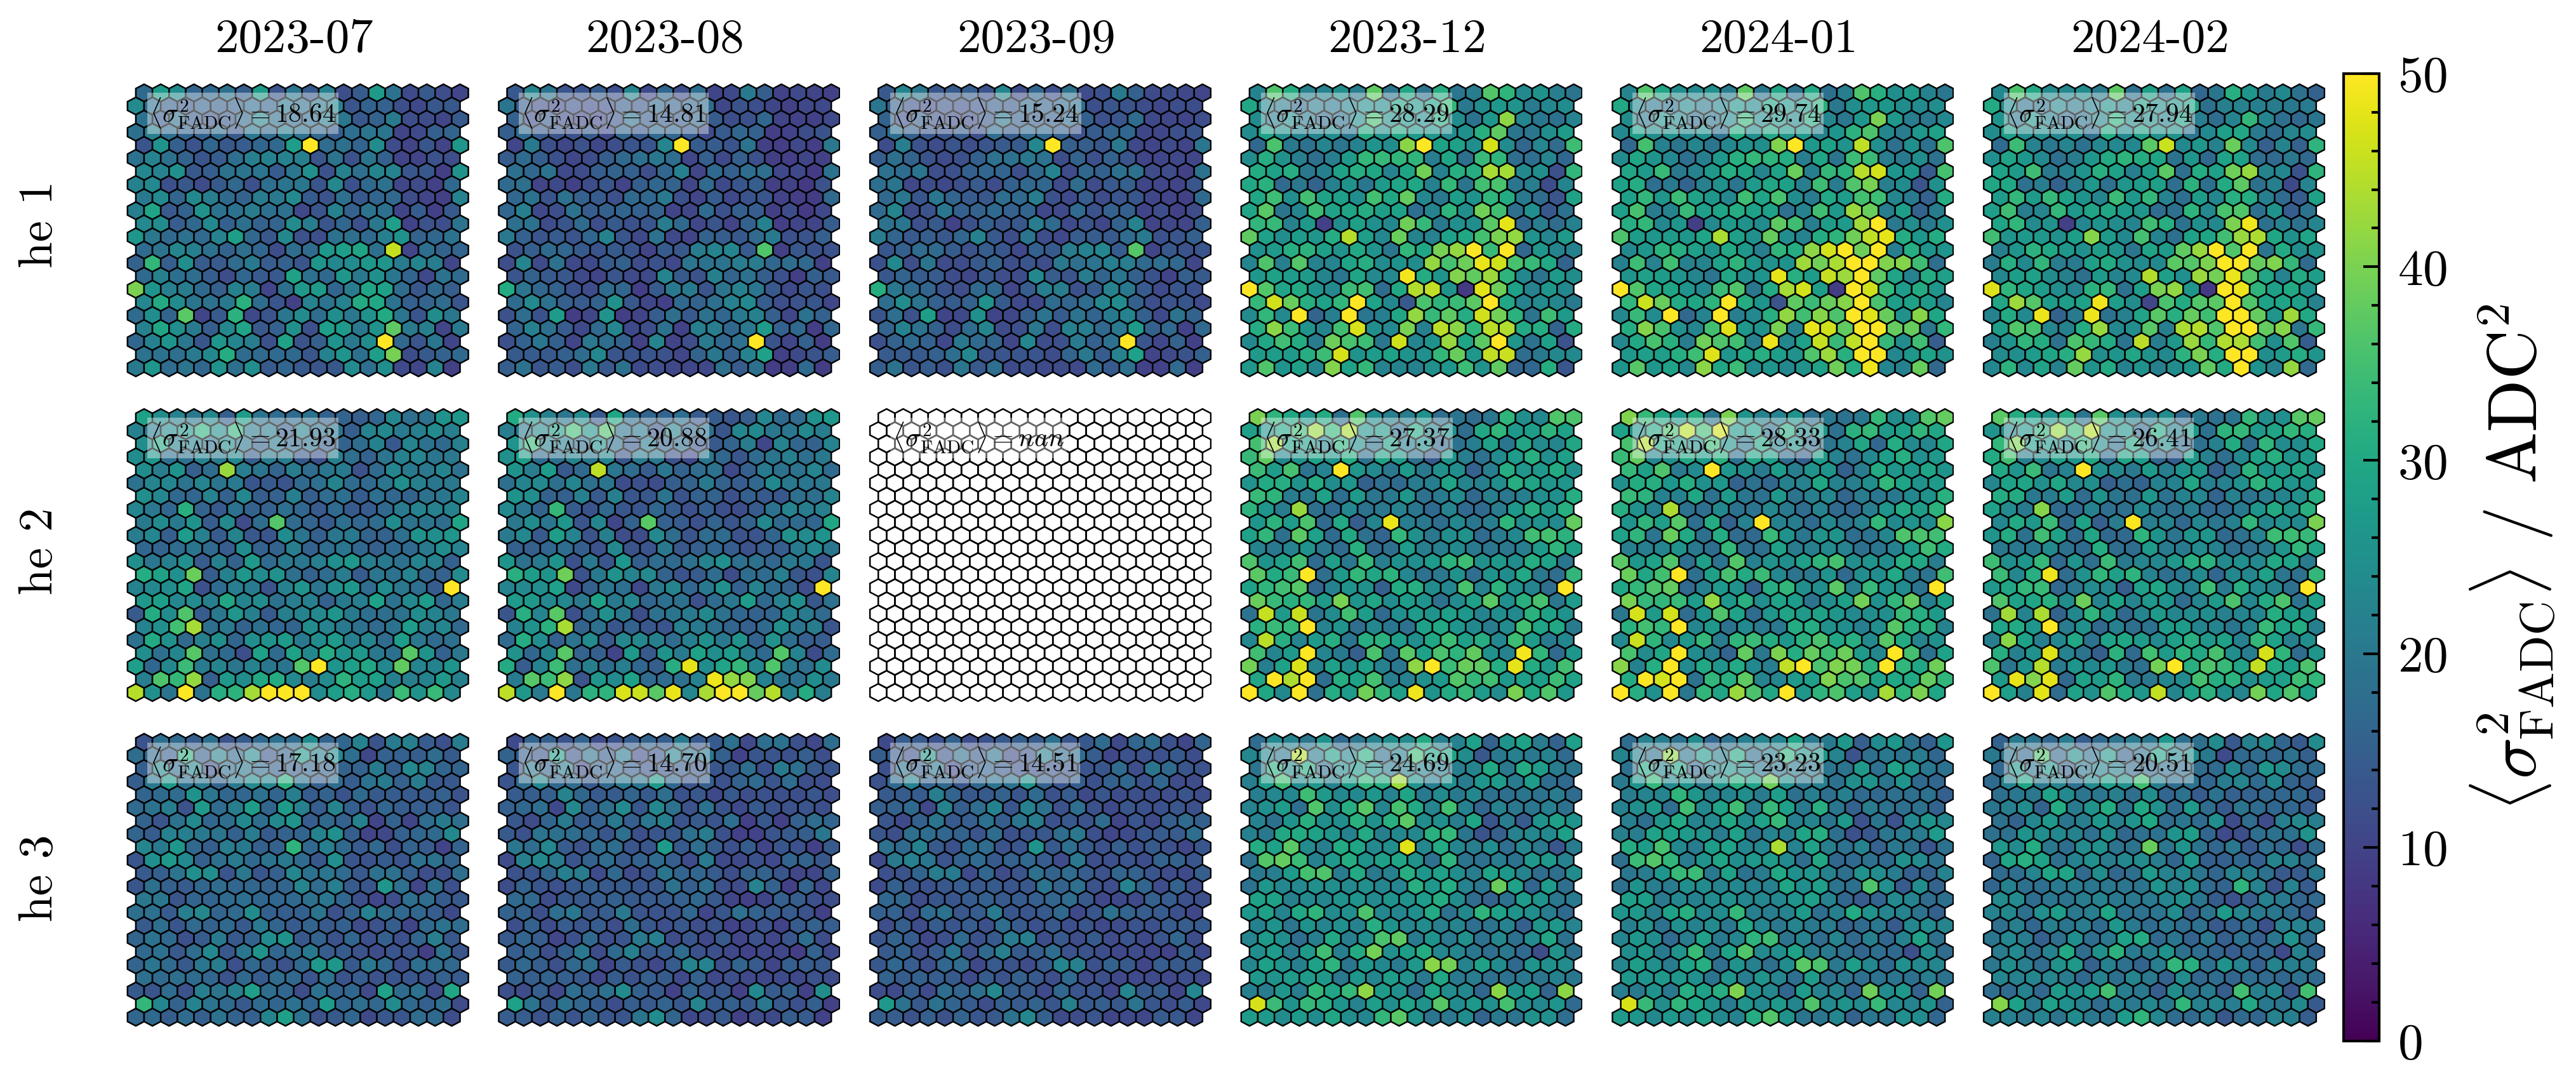

In [3]:
from datetime import datetime
from utils.Auger.FD import PixelPlot
from matplotlib.gridspec import GridSpec

files = [  #'2022-10-01-12utc.root',
    #  '2023-03-01-12utc.root',
    #  '2023-04-01-12utc.root',
    #  '2023-05-01-12utc.root',
    #  '2023-06-01-12utc.root',
    "2023-07-01-12utc.root",
    "2023-08-01-12utc.root",
    "2023-09-01-12utc.root",
    #  '2023-10-01-12utc.root',
    #  '2023-11-01-12utc.root',
    "2023-12-01-12utc.root",
    "2024-01-01-12utc.root",
    "2024-02-01-12utc.root",
]

# fig1, laxes = plt.subplots(len(files), 1, sharey=True)
# fig1.text(.02, 0.5, 'Variance / $\mathrm{ADC}^2$', rotation=90,
#          fontdict={'ha' : 'center', 'va' : 'center', 'fontsize' : 18})
# plt.subplots_adjust(hspace=0.6)

fig2 = plt.figure()
gs = GridSpec(
    3,
    len(files) + 1,
    figure=fig2,
    width_ratios=[1 for _ in files] + [0.1],
    height_ratios=[1 / 3, 1 / 3, 1 / 3],
)
gs.update(left=0.05, right=0.95, wspace=0.05, hspace=0.02)

fig2.text(
    0.02,
    0.76,
    "he 1",
    rotation=90,
    fontdict={"ha": "center", "va": "center", "fontsize": 9},
)
fig2.text(
    0.02,
    0.5,
    "he 2",
    rotation=90,
    fontdict={"ha": "center", "va": "center", "fontsize": 9},
)
fig2.text(
    0.02,
    0.24,
    "he 3",
    rotation=90,
    fontdict={"ha": "center", "va": "center", "fontsize": 9},
)

method = "_"
if method == "_":
    vmin, vmax = 0, 50
    name = "raw_variance"
    unit = "$\mathrm{{ADC}}^2$"
    symbol = ""
elif method == "cala":
    vmin, vmax = 30, 140
    name = "CalA_normalized"
    symbol = "K_\mathrm{D}"
    unit = r"$\mathrm{{ADC}}\times\mathrm{{photon}}$"
elif method == "xy":
    vmin, vmax = 30, 140
    name = "XY_normalized"
    symbol = "K_\mathrm{XY}"
    unit = r"$\mathrm{{ADC}}\times\mathrm{{photon}}$"

means_before, means_after = [], []
font_dict = {
    "fontsize": 5,
    "ha": "left",
    "va": "top",
}
bbox_dict = {"boxstyle": "square", "fc": "w", "ec": "none", "alpha": 0.4, "pad": 0.1}
text_kwargs = {"c": "k", "weight": "black", **font_dict, "bbox": bbox_dict}

for col, file in enumerate(files):

    start, stop, var = get_start_stop_variance(file)

    # skip = 35 if file == '2022-10-01-12utc.root' else 0
    # timestamps = [datetime.fromtimestamp(0.5*(e+b)) for e, b in zip(start, stop)]
    # lax.set_title(file[:7], pad=1, fontsize=6)
    # lax.set_xticklabels([])

    # lax.scatter(timestamps[skip:], np.mean(var[skip:,0,:], axis=1), label='Heat #1', s=0.1)
    # lax.scatter(timestamps[skip:], np.mean(var[skip:,1,:], axis=1), label='Heat #2', s=0.1, zorder=10)
    # lax.scatter(timestamps[skip:], np.mean(var[skip:,2,:], axis=1), label='Heat #3', s=0.1)
    # lax.legend(ncols=3, fontsize=5)

    ax1, ax2, ax3 = [fig2.add_subplot(gs[i, col]) for i in range(3)]

    for i in range(len(var)):
        for j in range(len(var[i])):
            var[i, j, np.logical_or(var[i, j] < 8, var[i, j] > 100)] = np.nan

    means = [np.nanmean(var[:, i, :], axis=0) for i in range(3)]

    # normalize with calibration constants
    calibration_constants = get_calibration_constant(file[:7], method)
    means = np.array(means) * calibration_constants  # * K_V?

    PixelPlot(means[0], ax=ax1, lw=0.3, vmin=vmin, vmax=vmax)
    PixelPlot(means[1], ax=ax2, lw=0.3, vmin=vmin, vmax=vmax)
    PixelPlot(means[2], ax=ax3, lw=0.3, vmin=vmin, vmax=vmax)
    ax1.set_title(file[:7], pad=4, fontsize=9)

    if file[:7] < "2023-11":
        if file[:7] in ["2023-09", "2023-07"]:  # skip heat 2 due to UpTime being down
            heat1, heat2, heat3 = np.nanmean(means, axis=1)
            heat2 = np.nan
            means_before.append([heat1, heat2, heat3])
        else:
            means_before.append(np.nanmean(means, axis=1))
    else:
        means_after.append(np.nanmean(means, axis=1))

    ax1.text(
        0.09,
        0.93,
        rf"$\langle\mathrm{{\sigma^2_\mathrm{{FADC}}}}{symbol}\rangle = {np.nanmean(means[0]):.2f}$",
        transform=ax1.transAxes,
        **text_kwargs,
    )
    ax2.text(
        0.09,
        0.93,
        rf"$\langle\mathrm{{\sigma^2_\mathrm{{FADC}}}}{symbol}\rangle = {np.nanmean(means[1]):.2f}$",
        transform=ax2.transAxes,
        **text_kwargs,
    )
    ax3.text(
        0.09,
        0.93,
        rf"$\langle\mathrm{{\sigma^2_\mathrm{{FADC}}}}{symbol}\rangle = {np.nanmean(means[2]):.2f}$",
        transform=ax3.transAxes,
        **text_kwargs,
    )


from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

norm = Normalize(vmin, vmax)

fig2.colorbar(
    ScalarMappable(norm, "viridis"),
    cax=fig2.add_subplot(gs[:, len(files)]),
    label=rf"$\langle\mathrm{{\sigma^2_\mathrm{{FADC}}}}{symbol}\rangle$ / {unit}",
)
fig2.savefig(
    f"/cr/users/filip/plots/malargue_2024_04/xy/{name}_shutter_corrected.png",
    bbox_inches="tight",
)

# fig1.savefig('/cr/users/filip/plots/XY-heat/NSB/time_series.png', bbox_inches='tight')

In [12]:
# raw variance
# shutter corrected

efficiency = (
    np.nanmean(means_after, axis=0) - np.nanmean(means_before, axis=0)
) / np.nanmean(means_before, axis=0)
print(efficiency)

[0.76568679 0.31053197 0.47498972]


In [19]:
# normalized to std. calib
# shutter corrected

efficiency = (
    np.nanmean(means_after, axis=0) - np.nanmean(means_before, axis=0)
) / np.nanmean(means_before, axis=0)
print(efficiency)

[1.20958065 0.31909685 0.48791667]


In [21]:
# normalized to xy
# shutter corrected

efficiency = (
    np.nanmean(means_after, axis=0) - np.nanmean(means_before, axis=0)
) / np.nanmean(means_before, axis=0)
print(efficiency)

[0.5189197  0.29953135 0.24269584]


In [25]:
# normalized to xy - preclean
# shutter corrected

efficiency = (
    np.nanmean(means_after, axis=0) - np.nanmean(means_before, axis=0)
) / np.nanmean(means_before, axis=0)
print(efficiency)

[0.79559847 0.32181685 0.4872998 ]


In [28]:
# normalized to xy - postclean
# shutter corrected

efficiency = (
    np.nanmean(means_after, axis=0) - np.nanmean(means_before, axis=0)
) / np.nanmean(means_before, axis=0)
print(efficiency)

[0.78997012 0.32320877 0.4835788 ]


# Find out about shutters/uptime

In [ ]:
file = uproot.open("2023-08-01-12utc.root:AugerUpTime")

start = file["uptime_gpsStart"].array()
stop = file["uptime_gpsStop"].array()

t = 0.5 * (start + stop)

ADC6 = file["ShutterFraction6ADC"].array()[:, -3:]
ADC8 = file["ShutterFraction8ADC"].array()[:, -3:]
ADC12 = file["ShutterFraction12ADC"].array()[:, -3:]

In [ ]:
plt.plot(t, np.sum(ADC6, axis=1))
plt.plot(t, np.sum(ADC8, axis=1))
plt.plot(t, np.sum(ADC12, axis=1))
plt.legend()

In [ ]:
ADC6